In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("restaurants_data.csv")  
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df['Cuisines'].head(10)

0            French, Japanese, Desserts
1                              Japanese
2      Seafood, Asian, Filipino, Indian
3                       Japanese, Sushi
4                      Japanese, Korean
5                               Chinese
6                       Asian, European
7    Seafood, Filipino, Asian, European
8               European, Asian, Indian
9                              Filipino
Name: Cuisines, dtype: object

In [6]:
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.strip()

In [7]:
df['Cuisine_Combo'] = df['Cuisines'].apply(lambda x: ', '.join(sorted(x.split(', ')[:2])))
combo_counts = df['Cuisine_Combo'].value_counts().head(10)
print(combo_counts)

Cuisine_Combo
Chinese, North Indian         1044
North Indian                   936
Mughlai, North Indian          670
Fast Food                      354
Chinese                        354
Cafe                           299
Bakery, Desserts               267
North Indian, South Indian     238
Bakery                         218
Chinese, Fast Food             180
Name: count, dtype: int64


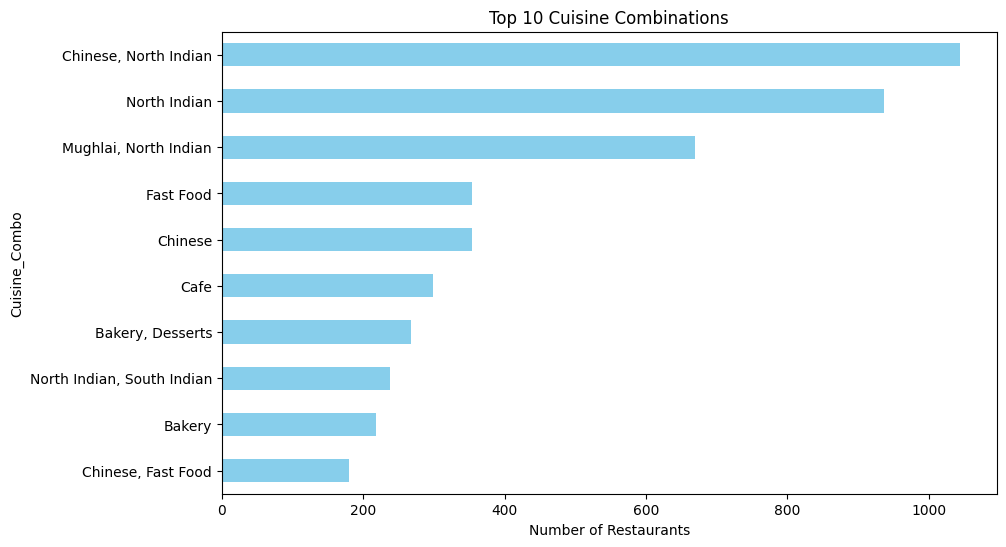

In [8]:
combo_counts.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisine Combinations")
plt.gca().invert_yaxis()
plt.show()

Cuisine_Combo
World Cuisine               4.90
American, Coffee and Tea    4.90
American, Caribbean         4.90
BBQ, Breakfast              4.90
Contemporary, European      4.90
Deli, Italian               4.90
European, German            4.90
Indonesian, Sunda           4.90
Continental, Indian         4.85
Filipino, Mexican           4.85
Name: Aggregate rating, dtype: float64


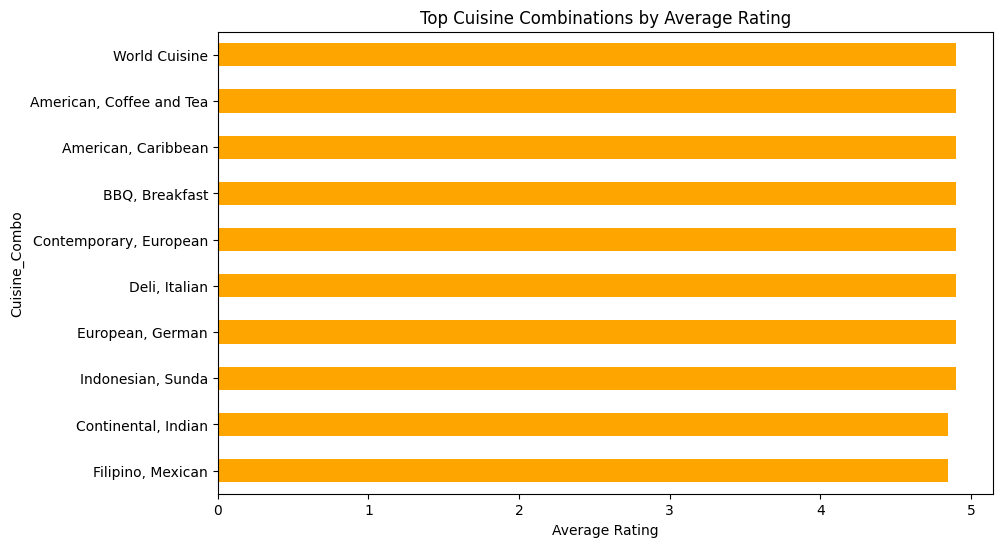

In [9]:
combo_ratings = df.groupby('Cuisine_Combo')['Aggregate rating'].mean().sort_values(ascending=False)
print(combo_ratings.head(10))
combo_ratings.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel("Average Rating")
plt.title("Top Cuisine Combinations by Average Rating")
plt.gca().invert_yaxis()
plt.show()